# Решение кейса для продуктовых аналитиков (лето 2025)

In [2]:
# Импорт необходимых библиотек
import pandas as pd # Pandas = таблицы и данные
import matplotlib.pyplot as plt # для построения графиков
import seaborn as sns # исключительно для визуализации графиков

In [3]:
# Отключение варнингов - лишние предупреждения
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Считывание данных из csv-файла и сохранение в переменную df  
df = pd.read_csv("kicksharing.csv")

In [ ]:
# Вывод первых 10 строк
display(df.head(10)) # показываем первые 10 строк

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,Мужчины,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,Женщины,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,Мужчины,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,Мужчины,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,Мужчины,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN
5,277397094,5247768,Мужчины,42,NaN,NaN,МОСКВА,7.49,50.0,300.0,SL,0.016090,2024-09-10 09:40:18.000000,2024-09-10 09:40:24.036000,2024-09-10 09:41:03.644495,3,2024-09-10 09:40:24.036000,0.00,NaN,NaN
6,273528957,801272780,Женщины,19,NaN,NaN,РЕСП ТАТАРСТАН,7.49,30.0,300.0,SL,4.086853,2024-09-03 14:10:29.000000,2024-09-03 14:10:34.524349,2024-09-03 14:21:25.119585,3,2024-09-03 14:10:34.524349,112.39,28.00,NaN
7,265062394,866880584,Мужчины,38,NaN,NaN,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,2.370597,2024-08-03 03:09:35.000000,2024-08-03 03:09:38.493851,2024-08-03 03:18:47.841493,5,2024-08-03 05:09:38.493851,89.90,12.99,NaN
8,351562880,762053500,Мужчины,19,NaN,NaN,НОВОСИБИРСКАЯ ОБЛ,5.99,30.0,300.0,E,0.101272,2024-10-04 10:45:16.000000,2024-10-04 10:45:20.457000,2024-10-04 10:47:39.863967,7,2024-10-04 14:45:20.457000,47.97,4.80,NaN
9,269365210,161703813,Мужчины,31,UGR,MAR,ЧЕЛЯБИНСКАЯ ОБЛ,6.49,30.0,300.0,E,1.487792,2024-08-19 14:35:17.000000,2024-08-19 14:35:20.199325,2024-08-19 14:42:53.835731,5,2024-08-19 16:35:20.199325,81.92,81.92,NaN


In [ ]:
# Вывод основной информации о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

In [14]:
df.describe()

,order_rk,party_rk,age,minute_cost,activation_cost,hold_amount,distance_km,book_time_zone_cd,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
count,3.967490e+05,3.967490e+05,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,366992.000000,21948.000000
mean,2.892236e+08,5.988426e+08,31.544006,7.288688,42.593226,299.983869,3.681031,3.536155,127.647694,37.516121,127.789319
std,3.813458e+07,3.311675e+08,9.434545,1.289492,11.989974,1.939153,141.862349,1.209075,100.122365,75.208560,496.812143
min,2.526112e+08,1.471700e+04,12.000000,1.500000,0.000000,80.000000,0.000000,0.000000,0.000000,-161.940000,1.000000
25%,2.618150e+08,2.962323e+08,24.000000,6.490000,30.000000,300.000000,0.941054,3.000000,80.840000,11.240000,43.000000
50%,2.704367e+08,6.110092e+08,31.000000,7.490000,50.000000,300.000000,1.729883,3.000000,103.940000,18.730000,62.000000
75%,3.432678e+08,8.646921e+08,37.000000,8.220000,50.000000,300.000000,3.063694,3.000000,142.100000,35.060000,81.000000
max,3.562528e+08,1.301075e+09,94.000000,19.990000,50.000000,500.000000,56012.640308,12.000000,5627.640000,3185.000000,55429.360970


In [15]:
# для корректного вывода и анализа даных избавимся от экспоненциальной записи
pd.options.display.float_format = '{:.3f}'.format

array([[<Axes: title={'center': 'order_rk'}>,
        <Axes: title={'center': 'party_rk'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'minute_cost'}>,
        <Axes: title={'center': 'activation_cost'}>,
        <Axes: title={'center': 'hold_amount'}>],
       [<Axes: title={'center': 'distance_km'}>,
        <Axes: title={'center': 'book_time_zone_cd'}>,
        <Axes: title={'center': 'nominal_price_rub_amt'}>],
       [<Axes: title={'center': 'loyalty_accrual_rub_amt'}>,
        <Axes: title={'center': 'loyalty_accrual_bns_amt'}>, <Axes: >]],
      dtype=object)

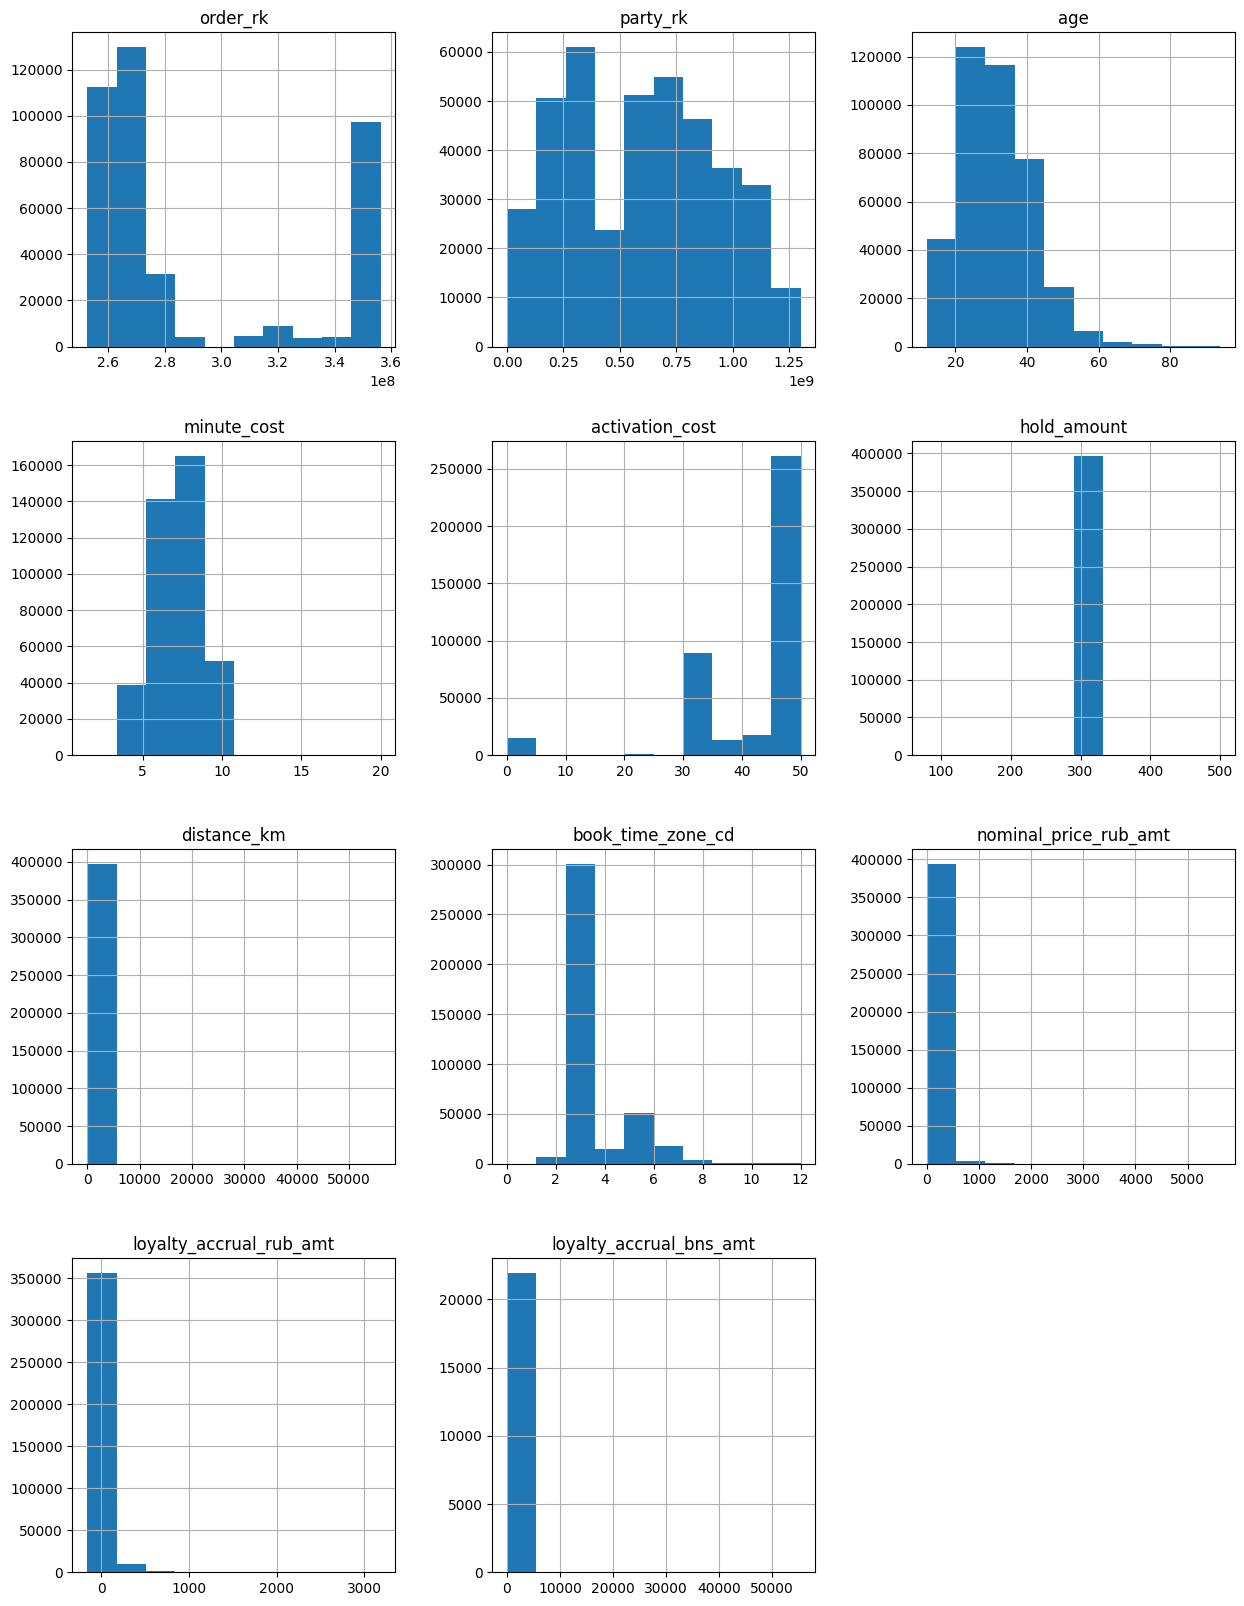

In [16]:
# Гистограмма для всех числовых столбцов таблице на одном графике
df.hist(
    ['order_rk', 'party_rk', 'age', 'minute_cost', 'activation_cost', 'hold_amount', 'distance_km', 'book_time_zone_cd', 'nominal_price_rub_amt', 'loyalty_accrual_rub_amt', 'loyalty_accrual_bns_amt'],
    figsize=(15, 20)
) 

In [ ]:
# Проверка количества пустых значений
df.isnull().sum()

order_rk                        0
party_rk                        0
gender_cd                    2921
age                             0
education_level_cd         206690
marital_status_cd          179020
lvn_state_nm                34177
minute_cost                     0
activation_cost                 0
hold_amount                     0
transport_model                 0
distance_km                     0
created_dttm                    0
book_start_dttm                 0
book_end_dttm                   0
book_time_zone_cd               0
local_book_start_dttm           0
nominal_price_rub_amt           0
loyalty_accrual_rub_amt     29757
loyalty_accrual_bns_amt    374801
dtype: int64

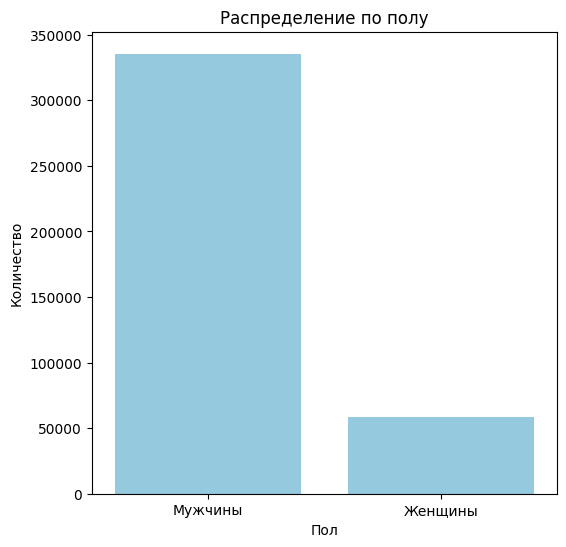

In [18]:
plt.figure(figsize=(6, 6))
sns.countplot(x=df.gender_cd, color='skyblue')


plt.title("Распределение по полу")
plt.xlabel("Пол")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.show()

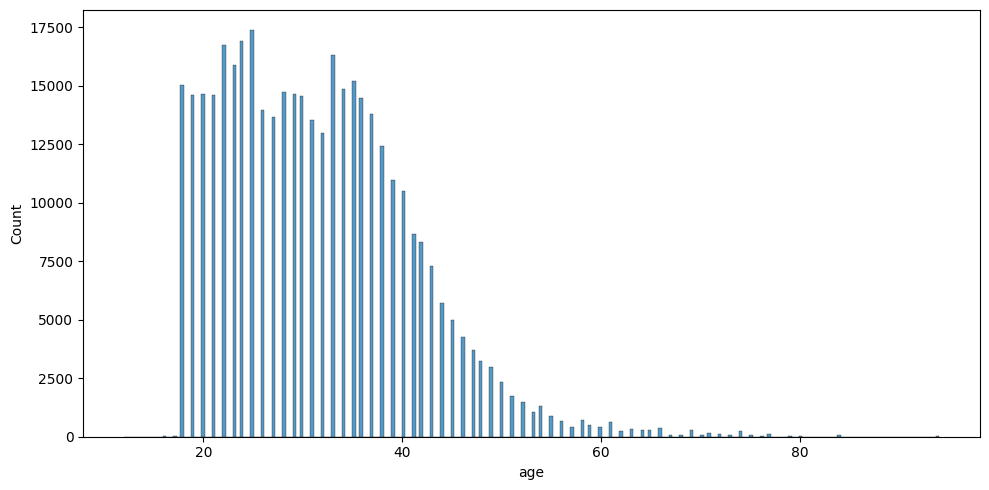

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(x=df.age)

plt.tight_layout()
plt.show()

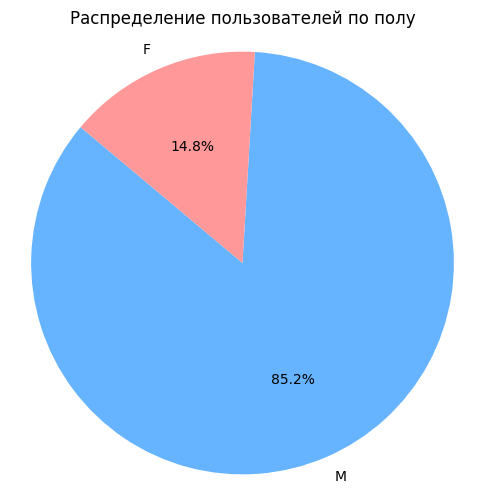

In [11]:
# Убираем пропущенные значения
gender_counts = df['gender_cd'].dropna().value_counts()
df['gender_cd'] = df['gender_cd'].replace({'M': 'Мужчины', 'F': 'Женщины'})

# Подписи и цвета (по желанию)
labels = gender_counts.index
colors = ['#66b3ff', '#ff9999', '#99ff99']  # Можно адаптировать под твои категории

# Построение круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Распределение пользователей по полу')
plt.axis('equal')  # Чтобы круг был ровным
plt.show()

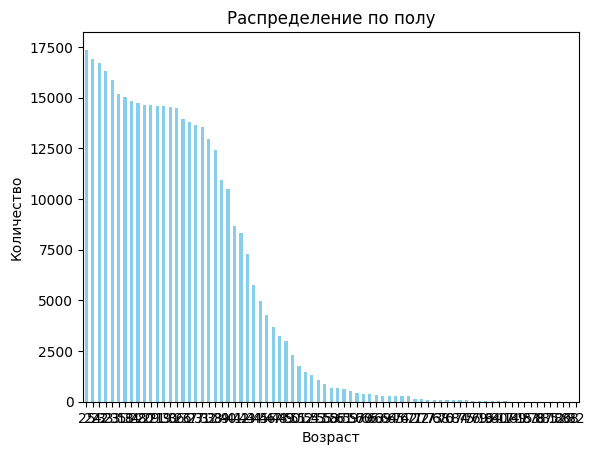

In [12]:
df['age'].value_counts(dropna=False).plot(kind='bar', color='skyblue')

plt.title("Распределение по полу")
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.show()